## Data Preparation

In [42]:
# Import relevant libraries
import pandas as pd # loading and manipulating data
%matplotlib inline
import matplotlib.pyplot as plt # for visualization
import numpy as np # working with arrays/performing statistical analysis

In [43]:
## Create dataframes for the metadata

# Dataframe for excel file
df = pd.ExcelFile(r'Metadata/Sarab_point_count_data_SAFE_formatted_aug_2020.xlsx')

# Dataframe for Point_count_recordings sheet (Audio files and collection)
pcr = pd.read_excel(df, sheet_name="Point_count_recordings")

# Dataframe for Point_count_data sheet (Animals visually and audibly observed)
pcd = pd.read_excel(df, sheet_name="Point_count_data")

# Dataframe for Audio_moths sheet (Location and collection of recorder)
audio = pd.read_excel(df, sheet_name="Audio_moths")

# Dataframe for Locations sheet (Information on the locations)
locations = pd.read_excel(df, sheet_name="Locations")

In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # This tells Jupyter to print the results for any variable or statement on it’s own line.

## Explore data by looking at first few rows of each dataset
pcr.head()
pcd.head()
audio.head()
locations.head()

,field_type,ID,ID.1,Location,Date,Time,Comments,Numeric,Numeric.1,Comments.1
0,description,Point count location,Audio file ID,Location in the SAFE landscape,Date of recording,Time of recording,Weather conditions of recording,Research assistant,Research assistant,Notes
1,units,NaN,NaN,NaN,dd/mm/yy,hh:mm:ss,NaN,Binary,Binary,NaN
2,method,NaN,NaN,NaN,NaN,NaN,Observation,Research assistant,Research assistant,NaN
3,field_name,Point_count_ID,Audio_file,Site,Date,Time,Weather,Adi_Syamin,Jani,Notes
4,1,18_03_06_1,PC0000_0003,E100 edge,2018-03-06 00:00:00,10:15:00,sun,1,1,NaN


,field_type,ID,Location,Taxa,Numeric,Time,Time.1,Categorical,Comments
0,description,Point count location,Location in the SAFE landscape,Common name of species seen and/or seen,Estimated distance of species,Time within the Point Count (0-20mins),The time of the observation,Visual or Audio sighting,Notes
1,levels,NaN,NaN,NaN,NaN,NaN,NaN,A;V;AV,NaN
2,units,NaN,NaN,NaN,metres,hh:mm:ss,hh:mm:ss,NaN,NaN
3,method,ID_code,Location,Observation,Observation,NaN,NaN,Observation,NaN
4,field_name,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual,Notes


,field_type,ID,Location,ID.1,Categorical,Date,Time,Date.1,Time.1,Comments
0,description,Point count location,Location in the SAFE landscape,Audio file ID,Location of recorder,Date the recorder was placed in forest,Time the recorder was set up in forest,Date the recorder was collected,Time the recorder was collected,Notes
1,levels,NaN,NaN,NaN,10m further; recorder tree; close to recorder ...,NaN,NaN,NaN,NaN,NaN
2,units,NaN,NaN,NaN,NaN,dd/mm/yyyy,hh:mm:ss,dd/mm/yyyy,hh:mm:ss,NaN
3,method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,field_name,Audio_file,Site,Audio_moth_ID,Tree,Setup_date,Setup_time,Collect_date,Collect_time,Notes


,Location name,New,Latitude,Longitude,Type,Elevation,ET before arrival,Notes
0,E100 edge,yes,4.68392,117.58604,Transect,379,"30 minutes drive, 1.5 hour walk",covered by leaves
1,D100 641,yes,4.71129,117.58753,Transect,479,"20 minutes drive, 30 minutes walk",NaN
2,C10 621,yes,4.71118,117.61899,Transect,403,"15 minutes drive, 45 minutes walk",NaN
3,B10,yes,4.72747,117.61433,Transect,352,takes only 30min to get there (walk + car),NaN
4,E1 648,yes,4.69372,117.58118,Transect,428,"30 minutes drive, 30 minutes walk",NaN


The column titles are not very descriptive of the values, and the first 5 rows are describing the values in the columns. I want to replace the column names with the row that describes the column values best, and remove the other 4 rows to clean the data.

In [45]:
# Replace the column names with the row that describes the column values best
pcr.columns = pcr.iloc[3]
pcd.columns = pcd.iloc[4]
audio.columns = audio.iloc[4]

# Remove irrelevant rows and columns that I won't need and save the dataframe
pcr = pcr.drop(pcr.index[:4])
pcr = pcr.drop(columns=["field_name", "Adi_Syamin" , "Jani", "Notes"])
pcr = pcr.reset_index(drop=True)
pcd = pcd.drop(pcd.index[:5])
pcd = pcd.drop(columns=["field_name", "Notes"])
pcd = pcd.reset_index(drop=True)
audio = audio.drop(audio.index[:5])
audio = audio.drop(columns=["field_name", "Notes"])
audio = audio.reset_index(drop=True)
locations = locations.drop(['New', 'ET before arrival', 'Notes'], axis=1)

# Print first few rows of each dataframe
pcr.head()
pcd.head()
audio.head()
locations.head()

3,Point_count_ID,Audio_file,Site,Date,Time,Weather
0,18_03_06_1,PC0000_0003,E100 edge,2018-03-06 00:00:00,10:15:00,sun
1,18_03_06_2,PC0000_0004,E100 edge,2018-03-06 00:00:00,11:00:00,sun
2,18_03_06_3,PC0000_0005,E100 edge,2018-03-06 00:00:00,12:00:00,sun
3,18_03_06_4,PC0000_0006,E100 edge,2018-03-06 00:00:00,13:00:00,sun
4,18_03_06_5,PC0000_0007,E100 edge,2018-03-06 00:00:00,14:00:00,sun


4,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_03_06_1,E100 edge,NaN,10,00:00:00,10:15:00,A
1,18_03_06_1,E100 edge,Fluffy-backed Tit-babbler,NaN,00:00:07,10:15:07,A
2,18_03_06_1,E100 edge,Blue-eared Barbet,60,00:00:37,10:15:37,A
3,18_03_06_1,E100 edge,Chestnut-winged Babbler,100,00:00:50,10:15:50,A
4,18_03_06_1,E100 edge,Blue-eared Barbet,30,00:00:54,10:15:54,A


4,Audio_file,Site,Audio_moth_ID,Tree,Setup_date,Setup_time,Collect_date,Collect_time
0,AM0008A,B1,AM3,recorder tree,2019-01-04 00:00:00,20:45:00,2019-01-09 00:00:00,21:25:00
1,AM0003A,D100 641,AM11,recorder tree,2018-12-24 00:00:00,12:20:00,2018-12-27 00:00:00,21:35:00
2,AM0013B,B1,AM6,10m further,2019-01-10 00:00:00,02:45:00,2019-01-22 00:00:00,03:38:00
3,AM0003B,D100 641,AM13,10m further,2018-12-24 00:00:00,12:20:00,2018-12-27 00:00:00,21:35:00
4,AM0004A,D Matrix,AM13,recorder tree,2018-12-28 00:00:00,03:55:00,2018-12-31 00:00:00,10:32:00


,Location name,Latitude,Longitude,Type,Elevation
0,E100 edge,4.68392,117.58604,Transect,379
1,D100 641,4.71129,117.58753,Transect,479
2,C10 621,4.71118,117.61899,Transect,403
3,B10,4.72747,117.61433,Transect,352
4,E1 648,4.69372,117.58118,Transect,428


Now that the data is clearer and more easily read, I would like to explore which species has the most data counts in the 'point count data' dataframe.

## How Many Species were Observed and Which Species has the Most Data Counts?

First I need to see if there's any missing values in the species' names and remove those since knowing the name of the species is important.

In [46]:
# Count the number of NaNs in each column
pcd.isna().sum()

4
Point_count_ID           69
Site                     79
Species_common_name     939
Est_distance           1193
PC_time                 470
Time_of_day             538
Audio_visual           1367
dtype: int64

In [47]:
# Remove the rows in the DataFrame that contain missing species name & location and save the dataframe.
pcd = pcd.dropna(subset=["Species_common_name" and "Site"])

# Count each species in the column to see which species has the most data counts
total_counts = pcd["Species_common_name"].value_counts()
total_counts

Bold-striped Tit-babbler     701
Yellow-vented Bulbul         595
House Gecko                  486
Human noise                  400
Yellow-bellied Prinia        398
                            ... 
Spiderhunter                   1
Thick-billed Flowerpecker      1
Bornean Blue Flycatcher        1
Rufous-backed Kingfisher       1
Mouse Deer                     1
Name: Species_common_name, Length: 315, dtype: int64

The 4th top count says 'Human noise', that looks like a mistake and shouldn't be in the species column. I will drop it from the dataframe.

Bold-striped Tit-babbler    701
Yellow-vented Bulbul        595
House Gecko                 486
Yellow-bellied Prinia       398
Little Spiderhunter         378
Tree Hole Frog              372
Chestnut-winged Babbler     295
Black-headed Bulbul         292
Cricket Frog                279
Rufous-tailed Tailorbird    252
Name: Species_common_name, dtype: int64

<AxesSubplot:title={'center':"The 10 species' with the most point count data"}, xlabel='Species', ylabel='Point Count Data'>

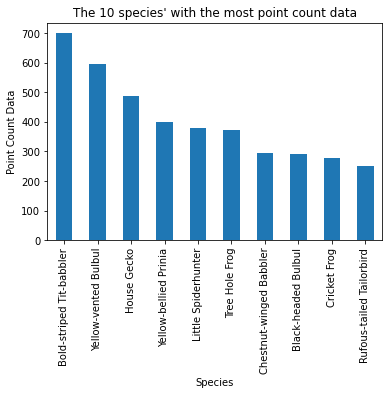

In [48]:
# Remove 'Human noise' row from dataframe
pcd = pcd[pcd["Species_common_name"] != "Human noise"]

# Redefine 'total counts'
total_counts = pcd["Species_common_name"].value_counts()

# Display the top 10 species with the most data counts
total_counts.head(10)

# Plot the top 10 species with their data counts
total_counts.head(10).plot.bar(xlabel="Species", ylabel="Point Count Data", title="The 10 species' with the most point count data")

- 315 different species were observed in the dataset.
- The Bold-striped Tit-Babbler has the most data counts (701 counts), followed by the Yellow-vented Bulbul (595 counts) and House Gecko (486 counts).
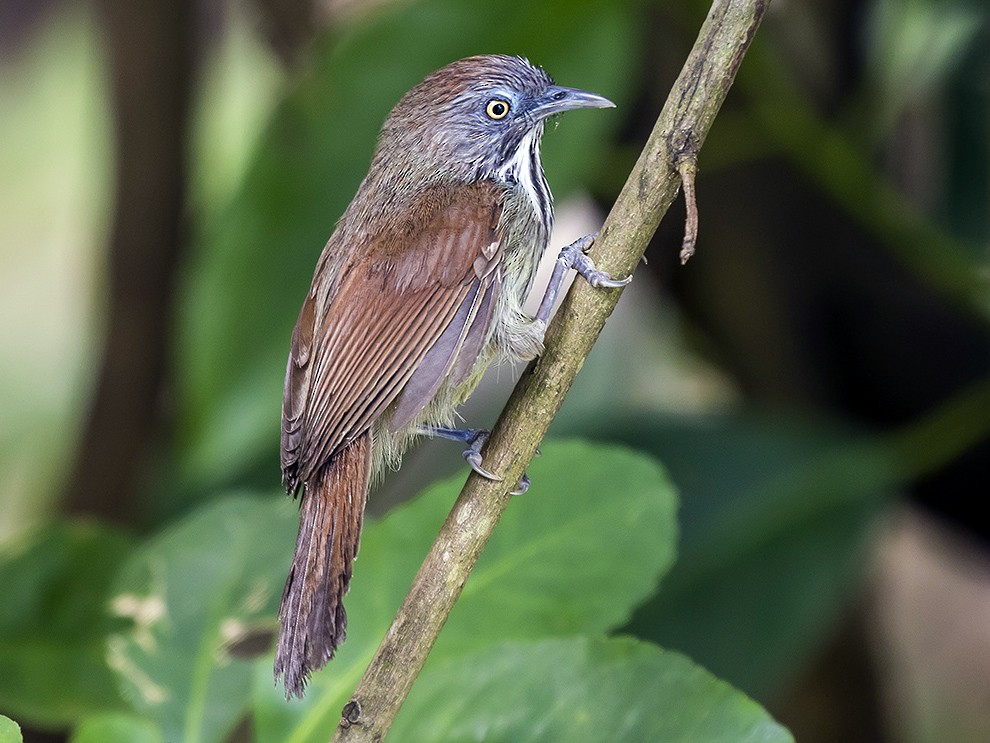
- Picture of Bold-striped Tit-Babbler
img_source: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/238083621/1800

## The Locations With the Most Data Where the Bold-striped Tit-Babbler Was Located

In [49]:
# Count each location in the column to see which location has the most point count data
total_pcd = pcd["Site"].value_counts() 
total_pcd

# Count locations where Bold-striped Tit-Babbler has point count data
pcd[pcd["Species_common_name"] == "Bold-striped Tit-babbler"]["Site"].value_counts()

C Matrix      1302
C10 621       1184
D Matrix      1173
OP Belian     1160
OP3 843        976
D100 641       899
VJR 1          878
VJR 2          857
E1 648         831
E100 edge      779
B10            722
B1 602         669
Riparian 1     609
Riparian 2     436
LFE river       31
Name: Site, dtype: int64

D Matrix     129
OP3 843      121
OP Belian    108
C Matrix     101
C10 621       84
E1 648        43
E100 edge     38
B10           38
D100 641      37
B1 602         1
VJR 1          1
Name: Site, dtype: int64


The locations with the most point count data are C Matrix (1302 counts) and C10 621 (1184 counts), but the locations where the Bold-striped Tit-babbler was observed the most are D Matrix (129 counts) and OP3 843 (121 counts).


The point counts show the species' that have been observed either visually or audibly or both. Let's see which locations have the most point count recordings available (recordings of species that have been observed audibly, or visually AND audibly) using the point count recordings dataset.

In [50]:
# Count the number of NaNs in each column
pcr.isna().sum()

3
Point_count_ID     1
Audio_file        22
Site               0
Date               0
Time               5
Weather           46
dtype: int64

In [51]:
# Remove the rows in the DataFrame that contain missing audio files and save the dataframe.
pcr = pcr.dropna(subset=["Audio_file"])

# Count each location in the column to see which location has the most recording counts
total_recordings = pcr["Site"].value_counts()
total_recordings

B1 602        121
OP Belian     119
E100 edge     112
D100 641      107
B10           106
Riparian 2    106
OP3 843       106
Riparian 1    102
D Matrix      102
VJR 1         101
C10 621        97
VJR 2          96
E1 648         95
C Matrix       84
LFE river       6
Name: Site, dtype: int64

The location with the most point count recordings is B1 602 with 121 counts. 

I'll continue exploring the data in another Jupyter Notebook, but I have to save the dataframes first.

In [52]:
# Save dataframes as excel files
pcd.to_excel('Metadata/pcd.xlsx', index=False)
pcr.to_excel('Metadata/pcr.xlsx', index=False)
audio.to_excel('Metadata/audio.xlsx', index=False)
locations.to_excel('Metadata/locations.xlsx', index=False)